# Hash Function Distribution Examples
This notebook contains Python code examples for evaluating hash function distribution across buckets.

In [23]:
import matplotlib.pyplot as plt
from collections import defaultdict
import hashlib
import statistics

Reflection #1
Reflect on the difference in distributions:
The python distribution and SHA-256 are both very similar in distrubution, meaning they are both most likley very effective.
The ASCII distrubtuion is all even, but every bucket is basically completely filled up, so Im sure this means it is not very effective even if they are all distrubuted evenly. 
The poor distrubtion is just that, poor, so not suprises when it came out to have one huge bucket.  

Consider Implications on Performance:
Python and SHA-256 are very similar, so they may use similar algorithms 
The ASCII distrubution is all even but it probably takes a long time because theyre all so large.


## Utility Function: Bucket Distribution

In [13]:
def bucket_distribution(data, num_buckets, hash_fn):
    buckets = defaultdict(list)
    for item in data:
        bucket = hash_fn(item) % num_buckets
        buckets[bucket].append(item)
    return buckets

## Hash Function Definitions

In [14]:
def poor_hash(key):
    return len(key)

def simple_ascii_sum(key):
    return sum(ord(char) for char in key)

def hash_sha256(key):
    return int(hashlib.sha256(key.encode()).hexdigest(), 16)

## Dataset and Plotting Utility

In [16]:
data = [f"key{i}" for i in range(1000)]
num_buckets = 10

def plot_distribution(title, counts):
    plt.bar(range(len(counts)), counts)
    plt.title(title)
    plt.xlabel("Bucket")
    plt.ylabel("# of Keys")
    plt.show()

## Example 1: Python Built-in hash()

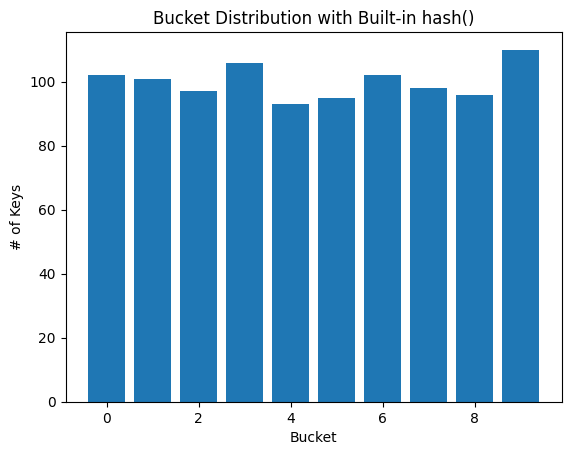

In [19]:
buckets = bucket_distribution(data, num_buckets, hash)
counts = [len(buckets[i]) for i in range(num_buckets)]
plot_distribution("Bucket Distribution with Built-in hash()", counts)

## Example 2: Poor Hash Function (len of key)

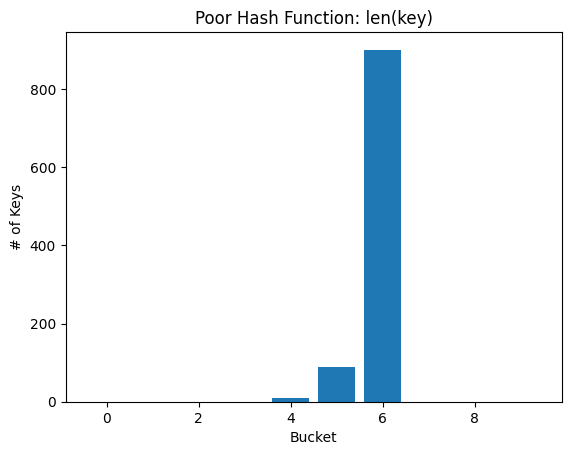

In [22]:
buckets = bucket_distribution(data, num_buckets, poor_hash)
counts = [len(buckets[i]) for i in range(num_buckets)]
plot_distribution("Poor Hash Function: len(key)", counts)

## Example 3: Simple ASCII Sum

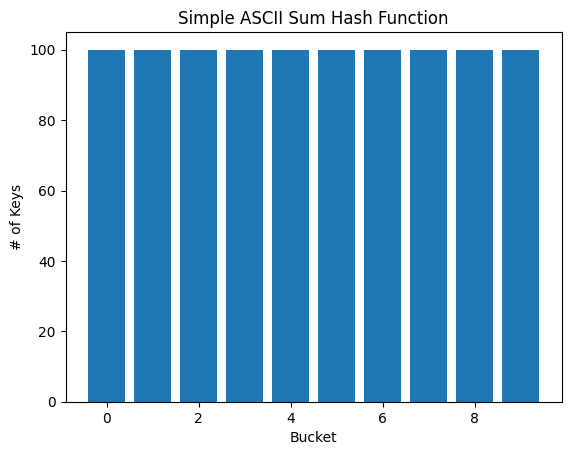

In [8]:
buckets = bucket_distribution(data, num_buckets, simple_ascii_sum)
counts = [len(buckets[i]) for i in range(num_buckets)]
plot_distribution("Simple ASCII Sum Hash Function", counts)

## Example 4: SHA-256

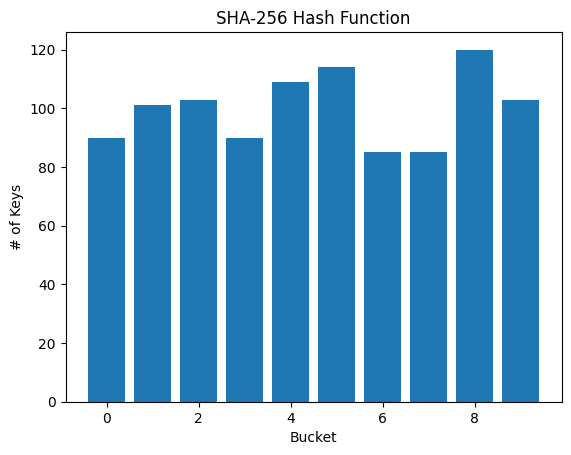

In [9]:
buckets = bucket_distribution(data, num_buckets, hash_sha256)
counts = [len(buckets[i]) for i in range(num_buckets)]
plot_distribution("SHA-256 Hash Function", counts)

## Metrics for Last Distribution

In [10]:
std_dev = statistics.stdev(counts)
max_bucket = max(counts)
collisions = sum(count - 1 for count in counts if count > 1)

print("=== Distribution Metrics ===")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Max Bucket Size: {max_bucket}")
print(f"Collisions: {collisions}")

=== Distribution Metrics ===
Standard Deviation: 12.23
Max Bucket Size: 120
Collisions: 990
